# **CS 457 - Homework Assignment 7: Classification**

### Breeha Qasim 08283

###### bq08283@st.habib.edu.pk

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree #Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [17]:
admission_data = pd.read_csv("Admission_Chance_Classification.csv")
# admission_data
# burger_data = pd.read_csv("burger-king-menu-2.csv")

# Part 1

## Q1

In [21]:
print(admission_data.columns)

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', ' SOP', 'LOR ', 'CGPA',
       'Research', 'Admit'],
      dtype='object')


In [23]:
non_numeric_cols = admission_data.select_dtypes(exclude=['int', 'float']).columns.tolist()
print("Non numerical columns:", non_numeric_cols)

Non numerical columns: ['Research', 'Admit']


In [25]:
admission_data = pd.get_dummies(admission_data, columns=['Research'])
admission_data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Admit,Research_NO,Research_YES
0,337,118,4,4.5,4.5,9.65,YES,False,True
1,324,107,4,4.0,4.5,8.87,YES,False,True
2,316,104,3,3.0,3.5,8.00,YES,False,True
3,322,110,3,3.5,2.5,8.67,YES,False,True
4,314,103,2,2.0,3.0,8.21,YES,True,False
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,YES,False,True
396,325,107,3,3.0,3.5,9.11,YES,False,True
397,330,116,4,5.0,4.5,9.45,YES,False,True
398,312,103,3,3.5,4.0,8.78,YES,True,False


In [27]:
X = admission_data.drop(columns=['Admit'])  
y = admission_data['Admit'] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99) 
print(f"Training X set shape: {X_train.shape}, Test X set shape: {X_test.shape}, Training y set shape: {y_train.shape}, Test y set shape: {y_test.shape} ")

Training X set shape: (280, 8), Test X set shape: (120, 8), Training y set shape: (280,), Test y set shape: (120,) 


##### **^Explanation/Reasoning:** To provide a balanced division for model training and evaluation, the data has been divided into 70% training and 30% testing sets. This configuration, which uses consistent splits for reproducibility, allows for a reliable evaluation of the model's performance on unseen data, with 280 samples in the training set and 120 in the test set.

## Q2

#### Done in Q1

## Q3

In [35]:
admission_data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Admit,Research_NO,Research_YES
0,337,118,4,4.5,4.5,9.65,YES,False,True
1,324,107,4,4.0,4.5,8.87,YES,False,True
2,316,104,3,3.0,3.5,8.00,YES,False,True
3,322,110,3,3.5,2.5,8.67,YES,False,True
4,314,103,2,2.0,3.0,8.21,YES,True,False
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,YES,False,True
396,325,107,3,3.0,3.5,9.11,YES,False,True
397,330,116,4,5.0,4.5,9.45,YES,False,True
398,312,103,3,3.5,4.0,8.78,YES,True,False


In [37]:
X = admission_data.drop(columns=['Admit'])  
y = admission_data['Admit'] 
dt_classifier = tree.DecisionTreeClassifier(random_state=99)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=100)
dt_classifier.fit(X_train, y_train)
train_pred = dt_classifier.predict(X_train)
print("Training Predictions:\n", train_pred)

Training Predictions:
 ['NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' '

In [39]:
acc_train = accuracy_score(y_train, train_pred) * 100
print("Training Accuracy:", acc_train)

Training Accuracy: 100.0


In [41]:
test_pred = dt_classifier.predict(X_test)
print("Test Predictions:\n", test_pred)

Test Predictions:
 ['YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES']


In [43]:
acc_test = accuracy_score(test_pred, y_test) * 100
print("Test Accuracy:", acc_test)

Test Accuracy: 89.16666666666667


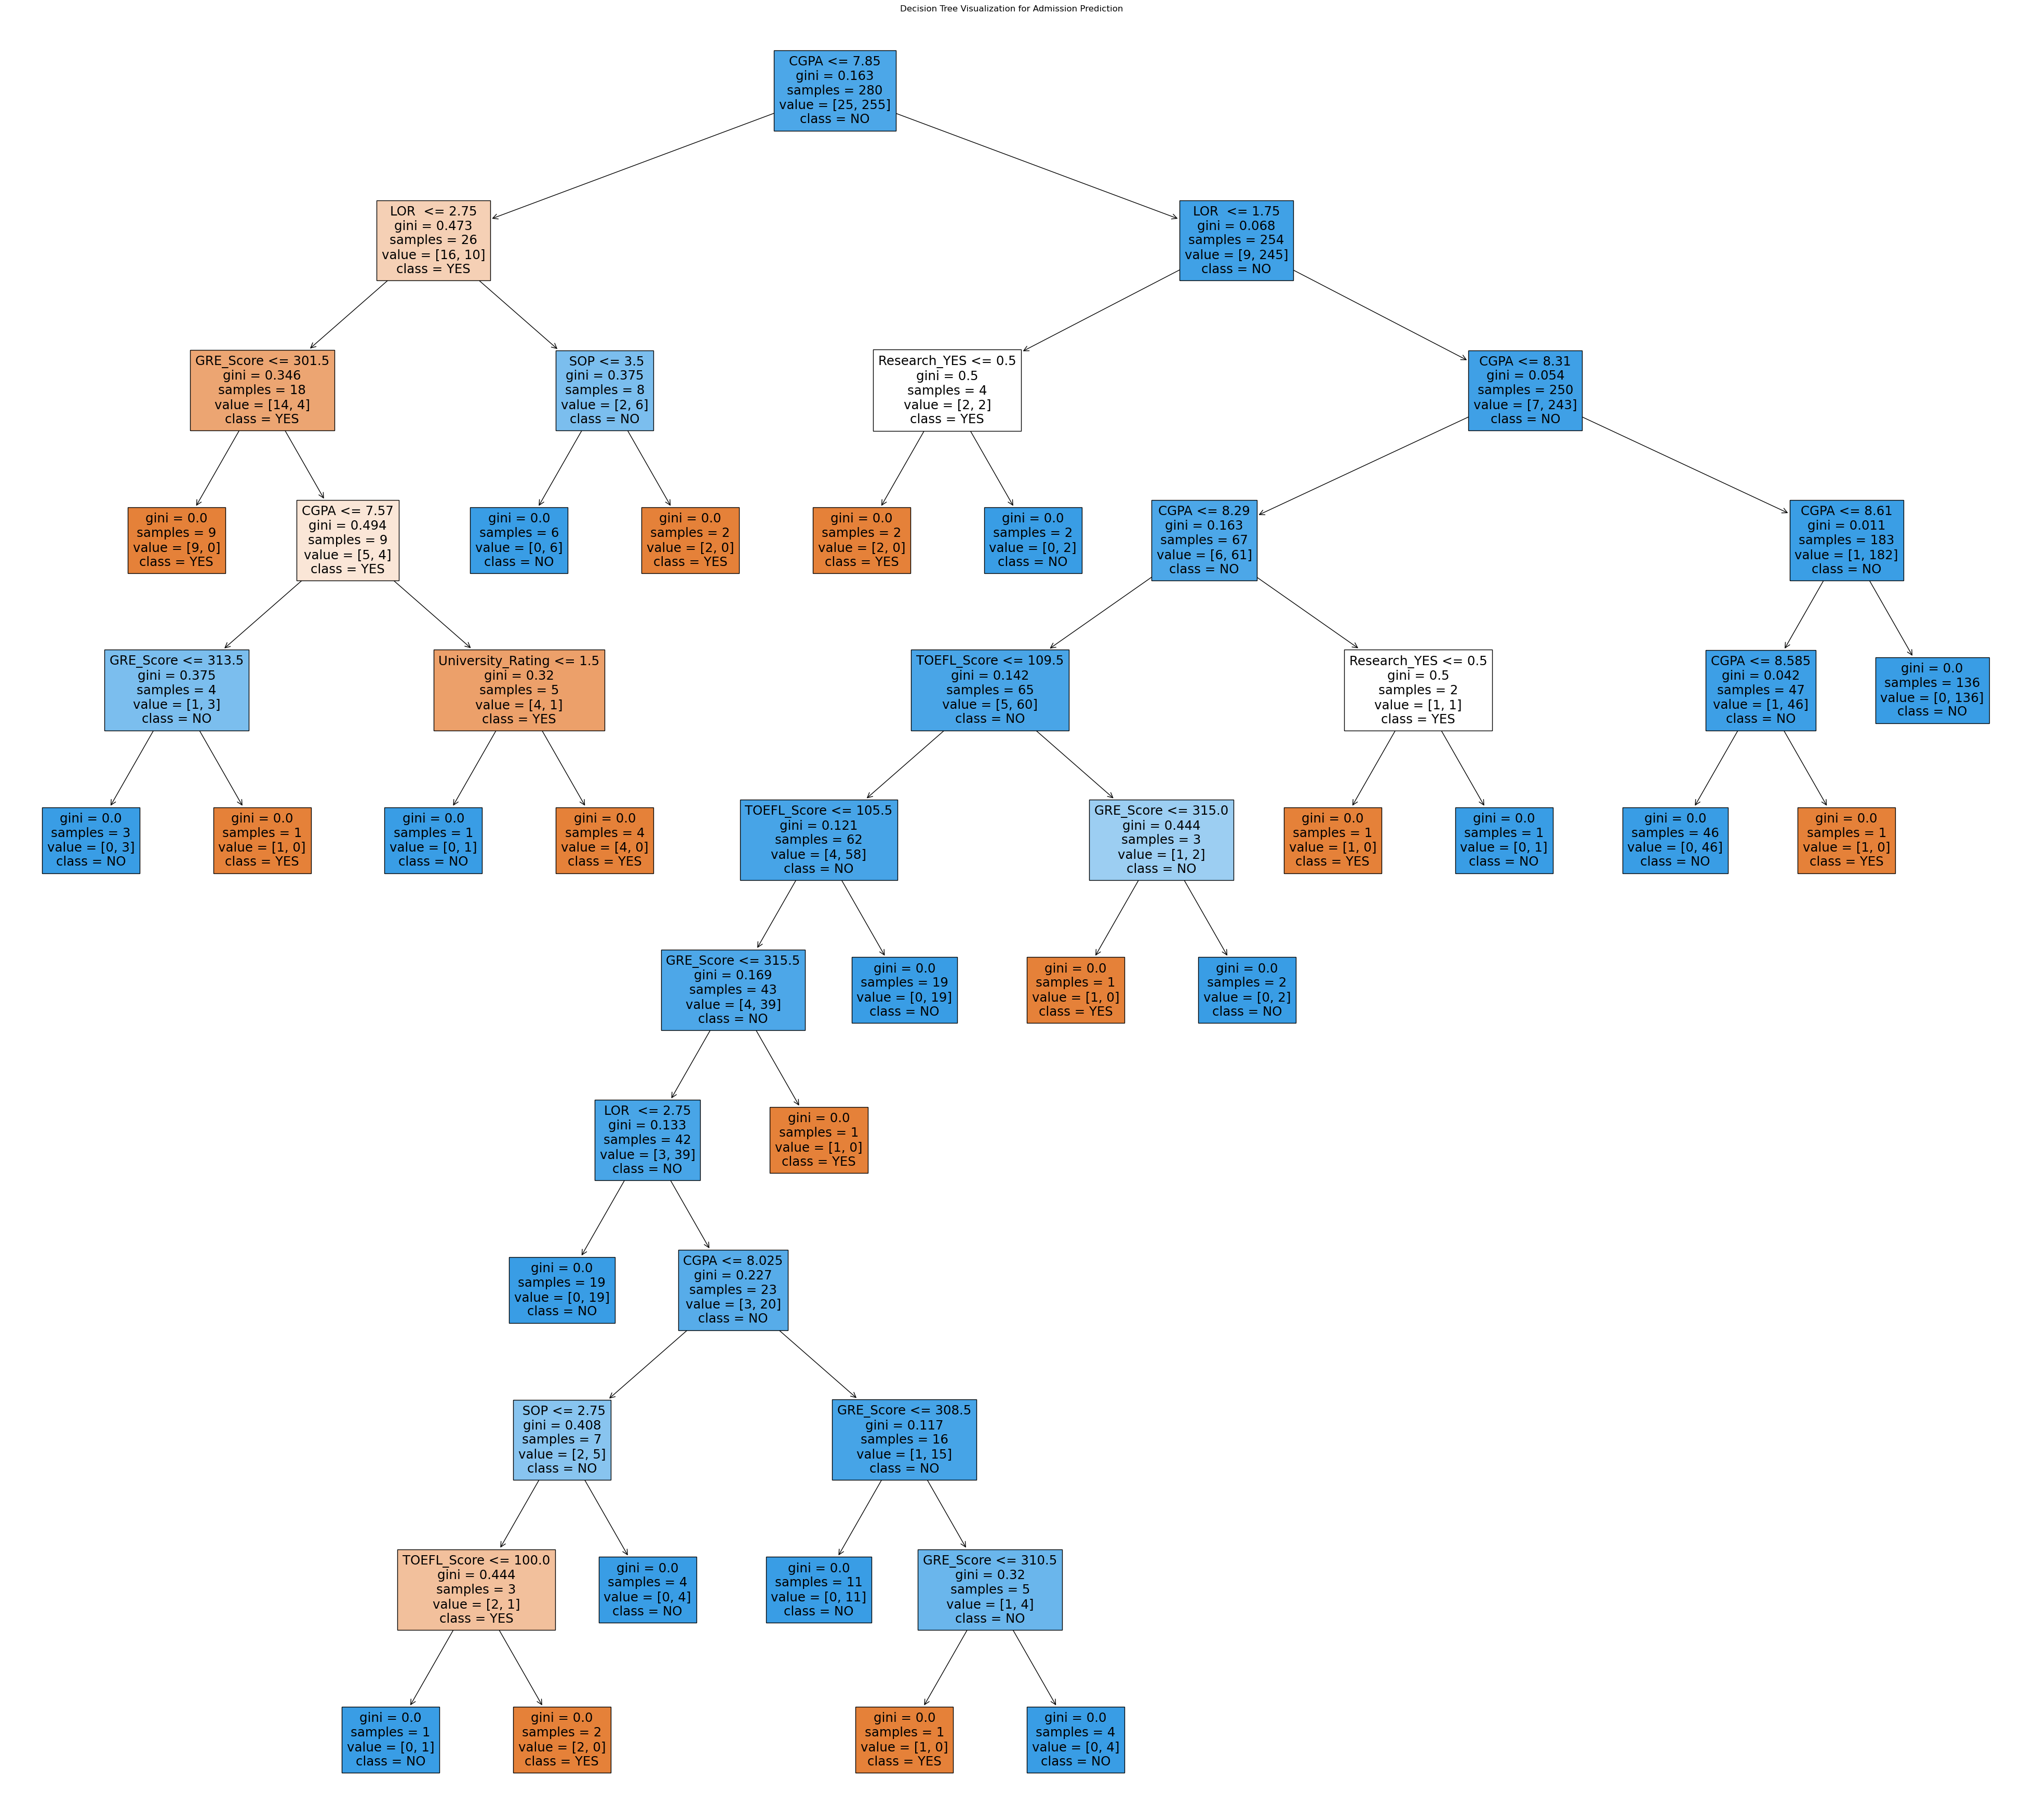

In [45]:
fig = plt.figure(figsize=(50, 45))
_ = tree.plot_tree(
    dt_classifier, 
    feature_names=list(X.columns),  
    class_names=y.value_counts().index.astype(str),  
    filled=True  
)
plt.title("Decision Tree Visualization for Admission Prediction")
plt.show()

In [59]:
# fig.savefig("C:/Users/breeh/Downloads/decision_tree1.png")

##### **^Explanation/Reasoning:** In order to predict admission, the Decision Tree gives priority to **CGPA** and **GRE Score**, with **LOR** (Letter of Recommendation) and **University Rating** showing up in secondary splits. According to the tree's structure, admission chances are greatly increased by high CGPA and GRE scores, however aspects like **Research** and **SOP** have less bearing and only have an impact on borderline situations. This hierarchy illustrates how academic measures are given precedence over other considerations when it comes to admissions.

## Q4

##### This significant difference between test and train accuracy indicates that the model is overfit and needs to be adjusted.



In [64]:
treeRepr = tree.export_text(dt_classifier)
print(treeRepr)

|--- feature_5 <= 7.85
|   |--- feature_4 <= 2.75
|   |   |--- feature_0 <= 301.50
|   |   |   |--- class: NO
|   |   |--- feature_0 >  301.50
|   |   |   |--- feature_5 <= 7.57
|   |   |   |   |--- feature_0 <= 313.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_0 >  313.50
|   |   |   |   |   |--- class: NO
|   |   |   |--- feature_5 >  7.57
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: NO
|   |--- feature_4 >  2.75
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: YES
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: NO
|--- feature_5 >  7.85
|   |--- feature_4 <= 1.75
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: NO
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: YES
|   |--- feature_4 >  1.75
|   |   |--- feature_5 <= 8.31
|   |   |   |--- feature_5 <= 8.29
|   |   |   |   |--- feature_1 <= 109.50
|   |   |   |   |   |--- feature_1 <= 10

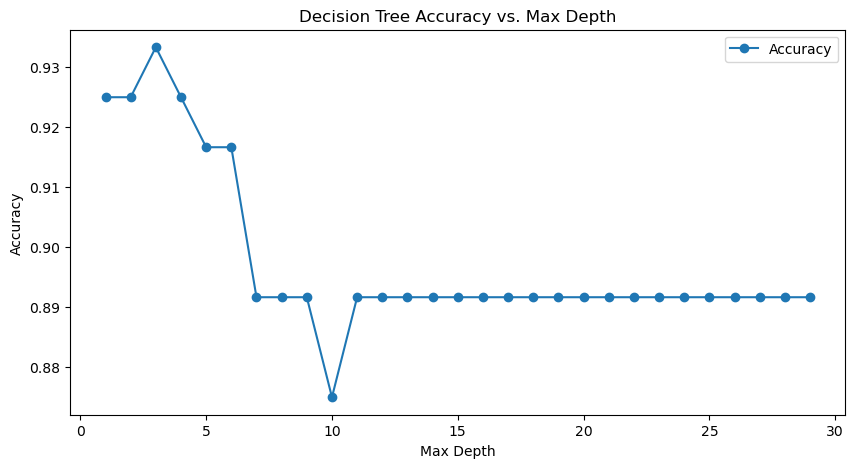

In [54]:
#taken from Week9-Classification-Class.ipynb
#we will need to narrow down some decision tree branches in order to address the overfitting issue. 

max_depth = []
acc = []

for i in range(1, 30):
    dtree = tree.DecisionTreeClassifier(max_depth=i, random_state=99)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
data = pd.DataFrame({'accuracy': pd.Series(acc), 'max_depth': pd.Series(max_depth)})

# visualizing changes in parameters
plt.figure(figsize=(10, 5))
plt.plot(data['max_depth'], data['accuracy'], marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(["Accuracy"])
plt.show()

##### According to the graph, the accuracy of the Decision Tree first rises and peaks at a depth of three to four before gradually falling and stabilising. This suggests that while deeper trees result in overfitting and decreased accuracy, smaller trees with a depth of 3–4 balance complexity with generalisation to produce the best accuracy.



In [66]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

96.78571428571429

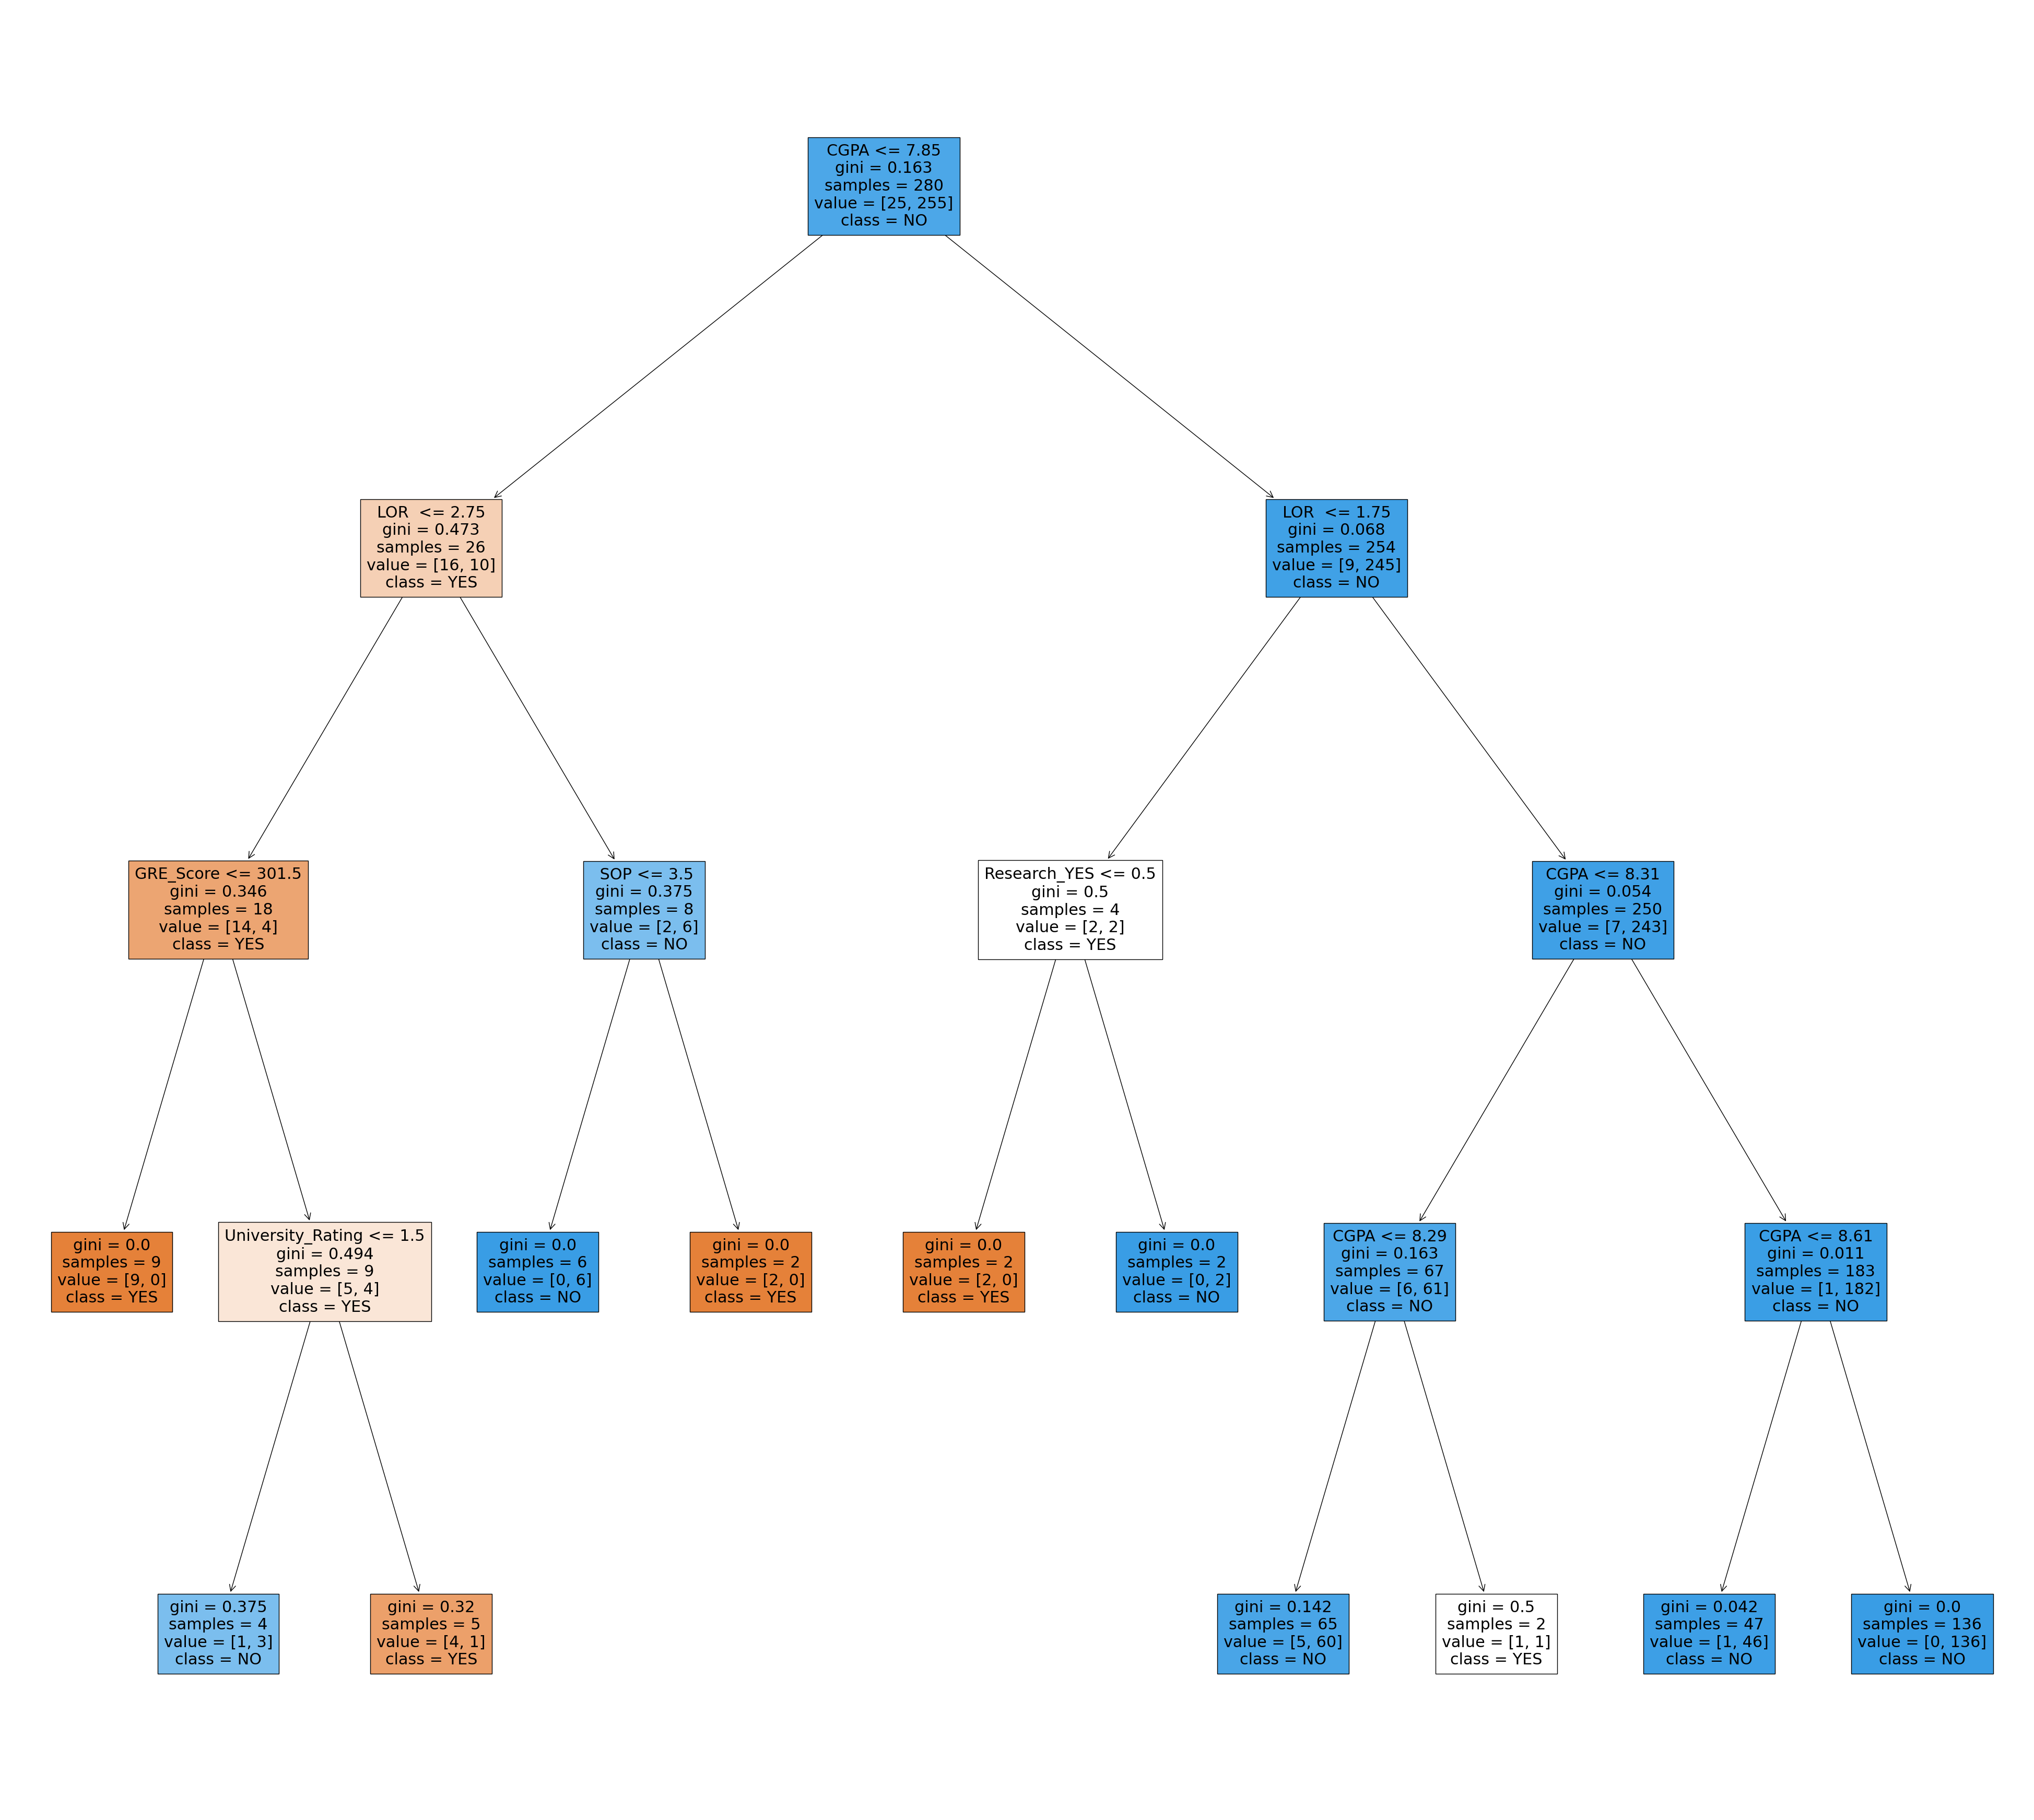

In [68]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=y.value_counts().index,
                   filled=True)

In [70]:
# fig.savefig("C:/Users/breeh/Downloads/pruning_tree.png")

##### **^Explanation/Reasoning:** With **CGPA** as the main admissions determinant and **LOR** and **GRE Score** as secondary splits, this trimmed Decision Tree concentrates on important characteristics. A simpler and easier-to-understand tree was produced by pruning off less significant splits, such as SOP and small thresholds. While superfluous complications are eliminated for improved generalisation, the pruned tree indicates that candidates with high CGPA, strong LOR, and GRE scores have greater odds. By reducing overfitting, this simplified structure  improves accuracy (from89.163% prior to pruning to96.795% following pruning). Les 
 significant splits have been eliminated by pruning, creating a more straightforward mod 
 that performs better when applied to unknown data.



## Q5

In [72]:
n_estimators_values = [10, 50, 100, 150, 200]
accuracies = []

for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=99)
    rf.fit(X_train, y_train) 
    pred = rf.predict(X_test)  
    accuracy = accuracy_score(y_test, pred) * 100  
    accuracies.append(accuracy)
    print(f"Accuracy for n_estimators={n}: {accuracy}")

Accuracy for n_estimators=10: 91.66666666666666
Accuracy for n_estimators=50: 94.16666666666667
Accuracy for n_estimators=100: 95.0
Accuracy for n_estimators=150: 95.83333333333334
Accuracy for n_estimators=200: 95.0


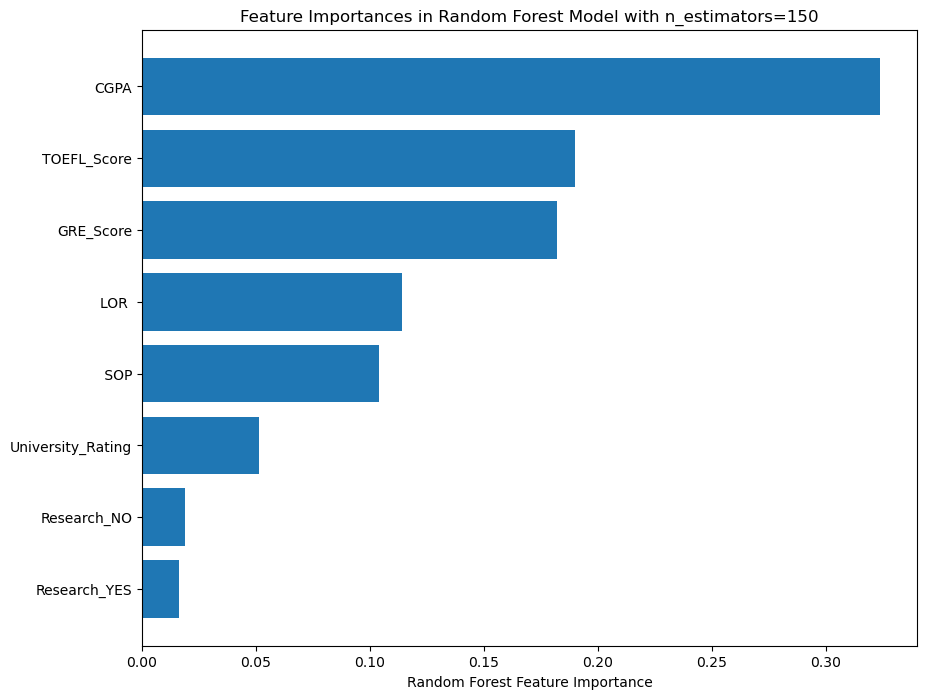

In [75]:
# Since 150 is providing us with the most accuracy to date, it is the best model we have. 
best_model = RandomForestClassifier(n_estimators=150, random_state=99)
best_model.fit(X_train, y_train)

feature_importances = best_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(list(X.columns[sorted_idx]), feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importances in Random Forest Model with n_estimators=150")
plt.show()

##### **CGPA** is currently the most significant feature we have.




## Q6

In [77]:
scoresDT = cross_val_score(dt_classifier, X, y, cv=5)
print(f'Cross Validation Score for Decission Tree Model {scoresDT.mean()}')

scoresRf = cross_val_score(best_model, X, y, cv=5)
print(f'Cross Validation Score for Random Forest Model {scoresRf.mean()}')

Cross Validation Score for Decission Tree Model 0.8800000000000001
Cross Validation Score for Random Forest Model 0.925


##### With an average accuracy of **92.5%** as opposed to **88%** for the Decision Tree, the cross-validation scores demonstrate that the **Random Forest model** performs better than the **Decision Tree model**. This suggests that, in comparison to a single Decision Tree, the Random Forest is more resilient and generalises better over many folds, most likely as a result of its ensemble nature, which lessens overfitting.



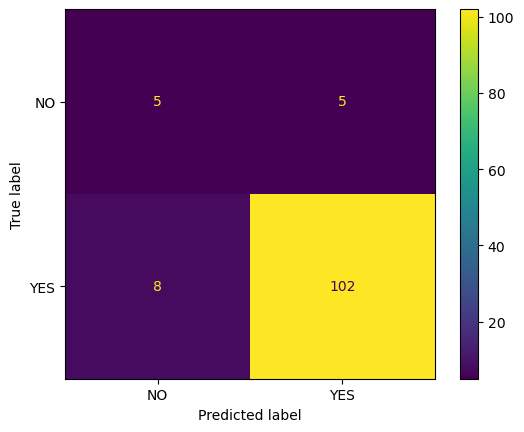

In [79]:
cm2 = confusion_matrix(y_test, test_pred) 
cp = ConfusionMatrixDisplay(cm2, display_labels=dt_classifier.classes_)
cp.plot()
plt.show()

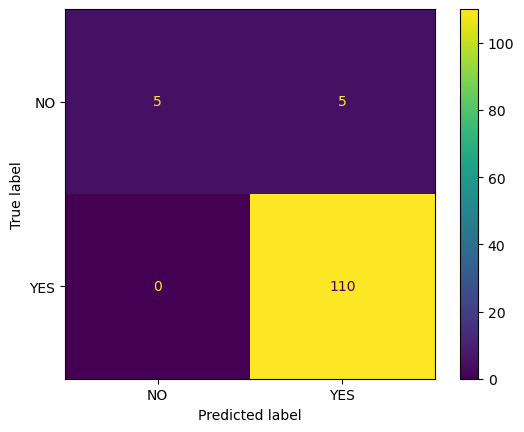

In [81]:
r_test = best_model.predict(X_test)
cm2 = confusion_matrix(y_test, r_test) 
cp = ConfusionMatrixDisplay(cm2, display_labels=best_model.classes_)
cp.plot()
plt.show()

##### **^Explanation/Reasoning:** With fewer overall misclassifications, the **Random Forest** model performs better in classification accuracy than the **Decision Tree**. In the confusion matrices, the Random Forest outperformed the Decision Tree in terms of generalisation and robustness, correctly classifying more "NO" and "YES" situations. The Random Forest's ensemble nature, which lowers overfitting and improves predictive performance, is the cause of this improvement.




# Part 2

In [48]:
burger_data = pd.read_csv("burger-king-menu-2.csv")
# burger_data

In [50]:
#filtering the data for a specific category "Burgers"
category = 'Burgers'
burger_filtered = burger_data[burger_data['Category'] == category]
# burger_filtered

In [52]:
#removing the 'Category' column
burger_filtered = burger_filtered.drop(columns=['Category'])
burger_filtered

,Item,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,980,580,64.0,24.0,3.0,195,1410,50,2,11,52
5,Triple Whopper® Sandwich,1130,680,75.0,28.0,4.0,255,1120,49,2,11,67
6,Triple Whopper® Sandwich with Cheese,1220,740,82.0,32.0,4.5,280,1470,50,2,11,71
7,Whopper JR.® Sandwich,310,160,18.0,5.0,0.5,40,390,27,1,7,13
8,Bacon King Sandwich,1150,710,79.0,31.0,3.5,240,2150,49,2,10,61
9,Cheddar Bacon King Sandwich,1190,750,84.0,33.0,3.5,235,1930,50,2,11,64


In [54]:
#using "Item" column as your class/label (Y)
X = burger_filtered.drop(columns=['Item'])
y = burger_filtered['Item']

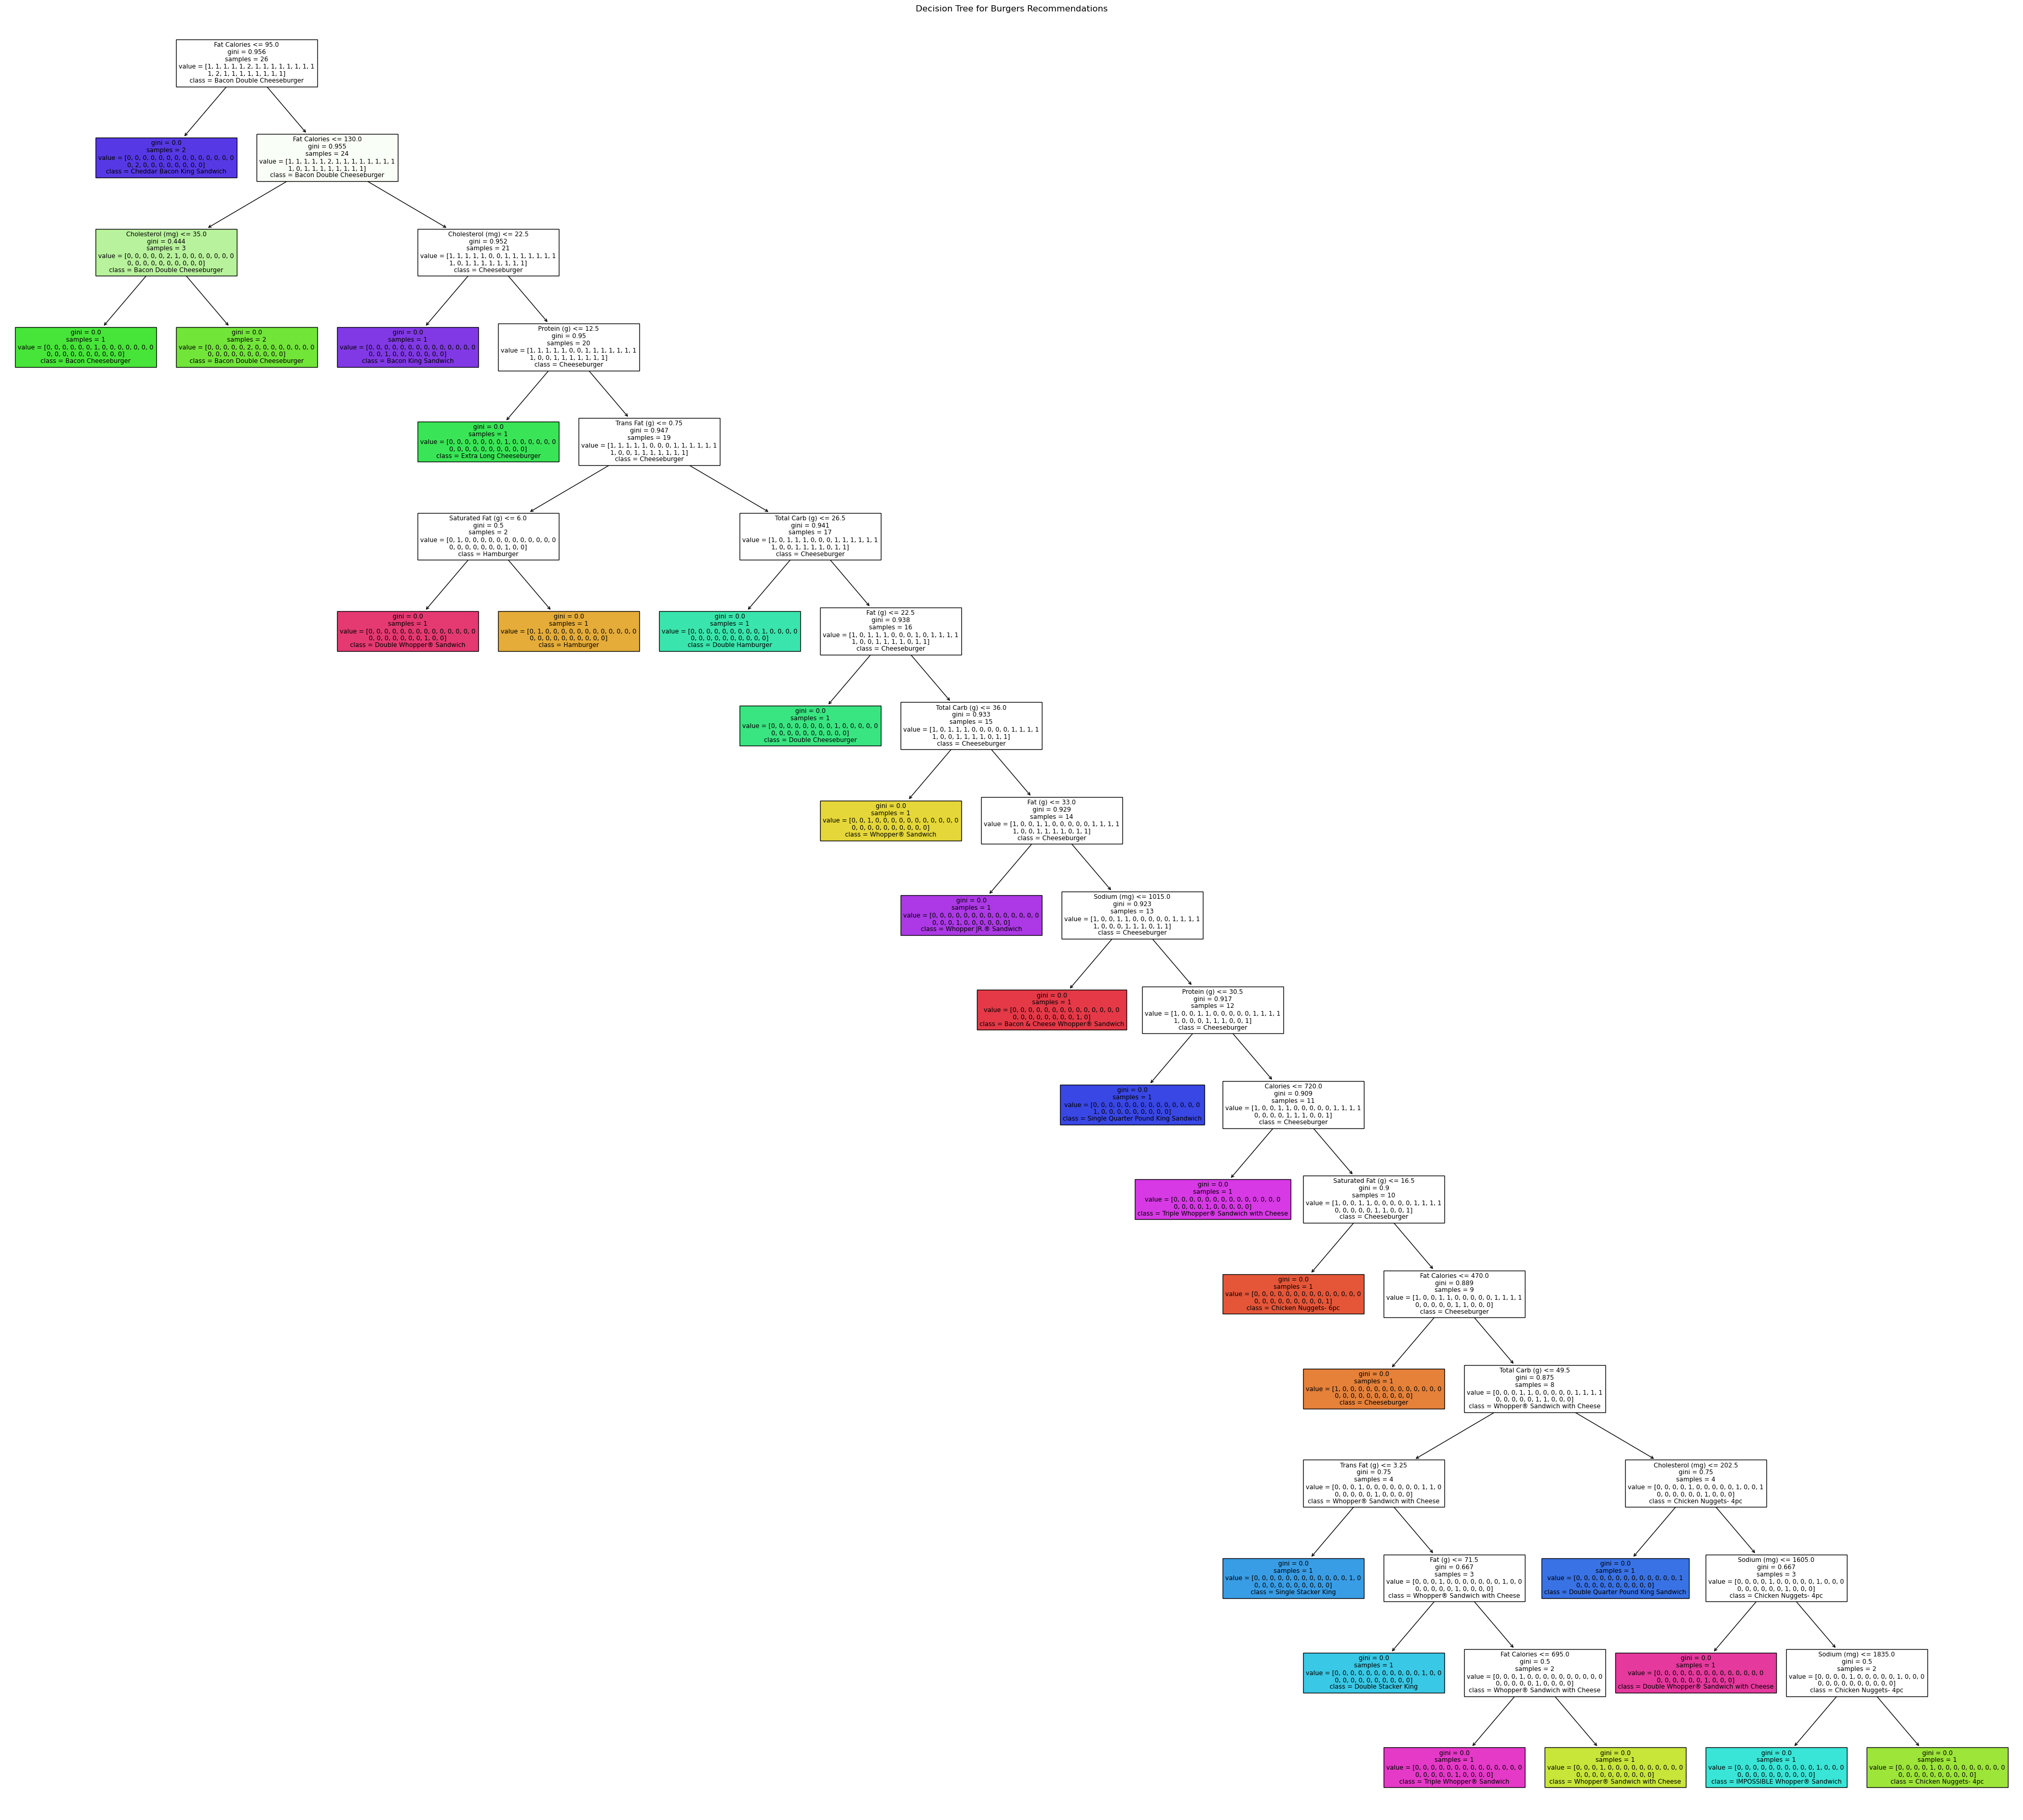

In [69]:
#creating a decision tree
dt_classifier = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=99)
dt_classifier.fit(X, y)
fig = plt.figure(figsize=(50, 45))
_ = tree.plot_tree(
    dt_classifier,  
    feature_names=list(X.columns),  
    class_names=y.value_counts().index.astype(str),  
    filled=True
)
plt.title(f'Decision Tree for {category} Recommendations')
plt.show()

In [75]:
# fig.savefig("C:/Users/breeh/Downloads/decistion_tree.png")

##### **^Explanation/Reasoning:** The **"Burgers"** category's decision tree suggests products based on dietary parameters like sodium, fat, and calories. For customers who are health-conscious, lower-calorie locations direct them to lighter selections like a `Basic Cheeseburger` or `Single Whopper`. Higher-calorie and higher-sodium branches, on the other hand, provide rich suggestions, such as the `Double Whopper with Cheese` or `Bacon Cheeseburger`, that are appropriate for people who want a stronger, healthier meal. This framework effectively narrows down options based on nutritional content by customising recommendations to dietary preferences.

